# San Francisco Airport

## Introduction
In this project, I aim to group airlines based on various features using clustering techniques. By applying unsupervised learning methods, such as K-Means, the goal is to identify patterns and similarities among airlines.

### Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import plotly.express as px
import warnings


### Setting Options

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

## Exploratory Data Analysis and Feature Engineering

In [3]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.shape

(18885, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df[df.isna().any(axis=1)]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18
6809,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73
6810,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73
6920,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160
6921,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160
7168,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118
7169,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118
7742,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40
7743,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40
7967,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64


### Filling Missing Airline Code Values Using the First Three Letters of Airline Names

In [8]:
df.loc[df.isna().any(axis=1), "Operating Airline IATA Code"] = df.loc[df.isna().any(axis=1), "Operating Airline"].str[:3].str.upper()
df.loc[df.isna().any(axis=1), "Published Airline IATA Code"] = df.loc[df.isna().any(axis=1), "Published Airline"].str[:3].str.upper()

In [9]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18885 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18885 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [11]:
df.nunique()

Activity Period                  156
Operating Airline                 89
Operating Airline IATA Code       87
Published Airline                 79
Published Airline IATA Code       78
GEO Summary                        2
GEO Region                         9
Activity Type Code                 3
Price Category Code                2
Terminal                           5
Boarding Area                      8
Passenger Count                13970
dtype: int64

In [12]:
df[df["Operating Airline"] != df["Published Airline"]]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
25,200507,American Eagle Airlines,MQ,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,5493
26,200507,American Eagle Airlines,MQ,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,5213
29,200507,Atlantic Southeast Airlines,EV,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,1552
30,200507,Atlantic Southeast Airlines,EV,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,1484
47,200507,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,5284
...,...,...,...,...,...,...,...,...,...,...,...,...
18827,201806,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,149286
18828,201806,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,153973
18829,201806,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,International,G,1284
18830,201806,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,Terminal 3,F,2619


### Splitting DataFrame into Clustering Features and Other Columns

In [13]:
clustering_df = df.drop(df.columns[:5], axis=1)
others = df[df.columns[:5]]

In [14]:
others.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code
0,200507,ATA Airlines,TZ,ATA Airlines,TZ
1,200507,ATA Airlines,TZ,ATA Airlines,TZ
2,200507,ATA Airlines,TZ,ATA Airlines,TZ
3,200507,Air Canada,AC,Air Canada,AC
4,200507,Air Canada,AC,Air Canada,AC


In [15]:
clustering_df.head()

,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,International,Canada,Enplaned,Other,Terminal 1,B,34090


### Applying One-Hot Encoding to Clustering Features

In [16]:
clustering_df = pd.get_dummies(clustering_df, drop_first=True)
clustering_df.head()

,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,27271,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
1,29131,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False
2,5415,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False
3,35156,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
4,34090,True,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False


In [17]:
clustering_df.shape

(18885, 24)

### Determining Optimal Clusters Using the Elbow Method

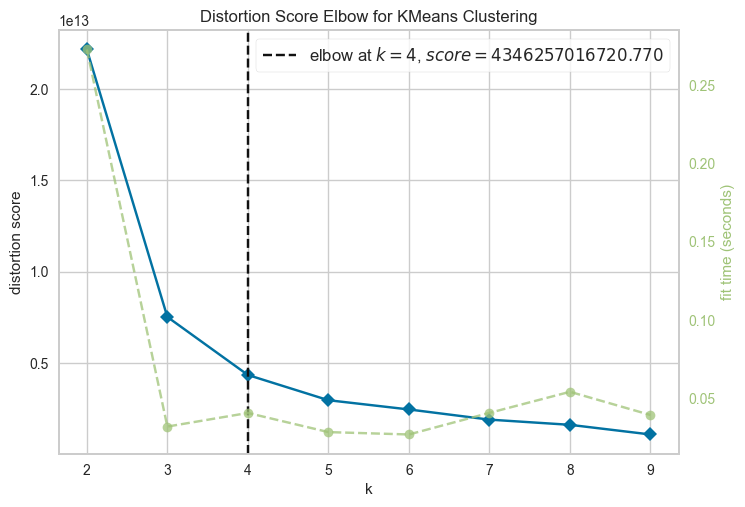

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(clustering_df)
vis.show()

## Training the Clustering Model

In [19]:
km = KMeans(4)

In [20]:
km.fit(clustering_df)

KMeans(n_clusters=4)

In [21]:
pred = km.predict(clustering_df)

In [22]:
clustering_df["cluster_result"] = pred

In [23]:
clustering_df.head()

,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,cluster_result
0,27271,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,0
1,29131,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,0
2,5415,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,0
3,35156,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,0
4,34090,True,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,0


### Testing the Model

In [24]:
silhouette_score(clustering_df, pred)

0.8200351594464876

### Dimensionality Reduction Using PCA

In [25]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(clustering_df)
labels = km.labels_
centroids = km.cluster_centers_

### Visualization of Clustering Model with Plotly

In [26]:
reduced_df = pd.DataFrame(reduced_df)
reduced_df.head()

,0,1
0,-2605.744398,-1.471989
1,-745.744398,-1.444398
2,-24461.744397,-1.622648
3,5279.255594,-0.085065
4,4213.255595,-0.073932


### Preparing the Final Dataframe

In [27]:
df = others
df["Feature1"] = reduced_df[0]
df["Feature2"] = reduced_df[1]
df["Label"] = labels
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,Feature1,Feature2,Label
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,-2605.744398,-1.471989,0
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,-745.744398,-1.444398,0
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,-24461.744397,-1.622648,0
3,200507,Air Canada,AC,Air Canada,AC,5279.255594,-0.085065,0
4,200507,Air Canada,AC,Air Canada,AC,4213.255595,-0.073932,0


### Visualizing Clustering Results

In [28]:
fig = px.scatter(df, x="Feature1", y="Feature2", color="Label", hover_name="Operating Airline", title="San Francisco Airport")
fig.show()